In [11]:
import numpy as np
import skfuzzy as skf
from skfuzzy import control as ctrl

In [12]:
temperature = ctrl.Antecedent(np.arange(20, 81, 1), 'temperature')
smoke = ctrl.Antecedent(np.arange(0, 1001, 1), 'smoke')
fire = ctrl.Antecedent(np.arange(0, 1001, 1), 'fire')
pump_speed = ctrl.Consequent(np.arange(0, 241, 1), 'pump_speed')

**Define Temperature**

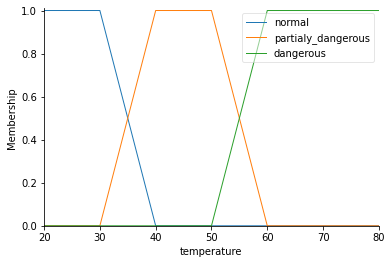

In [13]:
temperature['normal'] = skf.trapmf(temperature.universe, [20, 20, 30, 40])
temperature['partialy_dangerous'] = skf.trapmf(temperature.universe, [30, 40, 50, 60])
temperature['dangerous'] = skf.trapmf(temperature.universe, [50, 60, 80, 80])

temperature.view()

**Define Smoke**

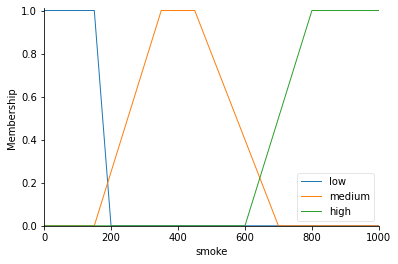

In [14]:
smoke['low'] = skf.trapmf(smoke.universe, [0, 0, 150, 200])
smoke['medium'] = skf.trapmf(smoke.universe, [150, 350, 450, 700])
smoke['high'] = skf.trapmf(smoke.universe, [600, 800, 1000, 1000])

smoke.view()

**Define Fire**

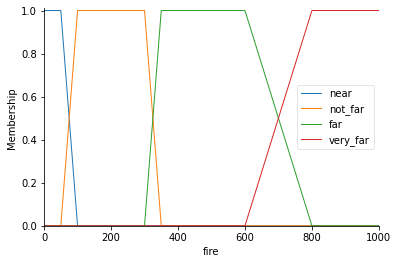

In [15]:
fire['near'] = skf.trapmf(fire.universe, [0, 0, 50, 100])
fire['not_far'] = skf.trapmf(fire.universe, [50, 100, 300, 350])
fire['far'] = skf.trapmf(fire.universe, [300, 350, 600,800])
fire['very_far'] = skf.trapmf(fire.universe, [600, 800, 1000, 1000])

fire.view()

**Define Pump Speed**

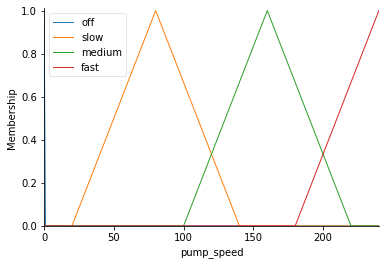

In [16]:
pump_speed['off'] = skf.trimf(pump_speed.universe, [0, 0, 0])
pump_speed['slow'] = skf.trimf(pump_speed.universe, [20, 80, 140])
pump_speed['medium'] = skf.trimf(pump_speed.universe, [100, 160, 220])
pump_speed['fast'] = skf.trapmf(pump_speed.universe, [180, 240, 240, 240])

pump_speed.view()

In [17]:
rules = [
    # temperature dangerous
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['near'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['not_far'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['near'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['very_far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['not_far'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['near'], pump_speed['fast']),

    # temperature partialy dangerous
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['near'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['near'], pump_speed['fast']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['near'], pump_speed['fast']),

    # temperature medium
    ctrl.Rule(temperature['normal'] & smoke['low'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['normal'] & smoke['low'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['low'] & fire['not_far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['low'] & fire['near'], pump_speed['medium']),
    ctrl.Rule(temperature['normal'] & smoke['medium'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['normal'] & smoke['medium'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['medium'] & fire['not_far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['medium'] & fire['near'], pump_speed['medium']),
    ctrl.Rule(temperature['normal'] & smoke['high'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['high'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['high'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['normal'] & smoke['high'] & fire['near'], pump_speed['medium'])
]

In [18]:
input_temperature = 40
input_fire = 900
input_smoke = 300

In [19]:
control_system = ctrl.ControlSystem(rules)

# Simulate the system
simulation = ctrl.ControlSystemSimulation(control_system)
simulation.input['temperature'] = input_temperature
simulation.input['smoke'] = input_smoke
simulation.input['fire'] = input_fire

simulation.compute()

# print(simulation.output['pump_speed'])

output_action = simulation.output['pump_speed']
print(output_action)
# output_action_value = skf.defuzz(pump_speed.universe, output_action, 'centroid')

0.35


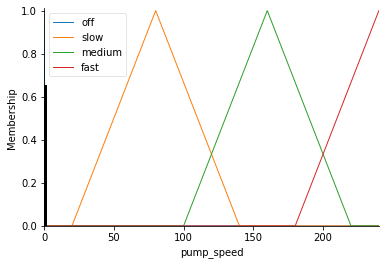

In [20]:
pump_speed.view(sim=simulation)